# Fourier point source

In [1]:
%load_ext autoreload
%autoreload 2
import site
import sys
site.addsitedir('..')

In [2]:
import numpy as np
from  matplotlib import pyplot as plt
from src.utils import *
from src.projection import project, rotate
from src.interpolate import *

## Important: in Fourier domain, the point is rotated in the fftshifted coordinates (i.e. 0 in the centre) - working now
Now it's working, no need to do it step by step from the next header

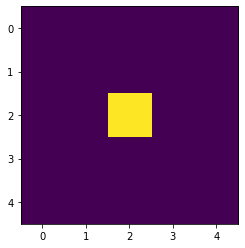

In [29]:
nx = 5
dx = 0.2

v = np.zeros([nx,nx,nx])
v[2,2,1] = 1
#v[1,1,0] = 1

plt.imshow(v[:,:,1])

In [30]:
x_freq = np.fft.fftfreq(nx, dx)
y_freq = np.fft.fftfreq(nx, dx)
z_freq = np.fft.fftfreq(nx, dx)

X, Y, Z = np.meshgrid(x_freq, y_freq, z_freq, indexing = 'xy')

### Do the steps in project

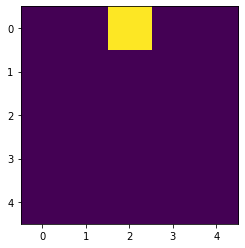

In [38]:
nx = 5
dx = 0.2

v = np.zeros([nx,nx,nx])
v[0,2,4] = 1

x_freq = np.fft.fftfreq(nx, dx)
y_freq = np.fft.fftfreq(nx, dx)
z_freq = np.fft.fftfreq(nx, dx)

X, Y, Z = np.meshgrid(x_freq, y_freq, z_freq, indexing = 'xy')

plt.imshow(v[:,:,4])

In [39]:
angles = np.array([0,np.pi/2,0])
X_r, Y_r,Z_r = rotate(X, Y, Z, angles)
slice_coords = np.array([X_r[:,:,0].flatten(), Y_r[:,:,0].flatten(), Z_r[:,:,0].flatten()])

In [40]:
slice_interp = interpolate(slice_coords, x_freq, y_freq, z_freq, np.fft.ifftshift(v),"tri")
slice_interp_2d = np.fft.fftshift(slice_interp.reshape(X_r.shape[0], X_r.shape[1]))

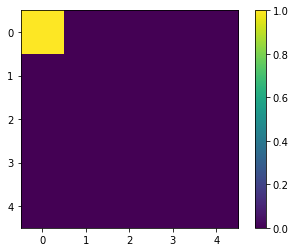

In [41]:
plt.imshow(slice_interp_2d); plt.colorbar()

In [24]:
slice_interp_2d

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.20710678, 0.58578644, 0.        ],
       [0.        , 0.        , 0.        , 0.20710678, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])